In [ ]:
import requests
import json
import csv
from datetime import timedelta, date, datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#List of states and union territories with order according to the data we get from our source
st_ut = ['title',
 'andaman and nicobar islands',
 'andhra pradesh',
 'arunachal pradesh ',
 'assam',
 'bihar',
 'chhattisgarh',
 'chandigarh',
 'delhi',
 'daman and diu',
 'goa',
 'gujarat',
 'himachal pradesh',
 'haryana',
 'jharkhand',
 'jammu and kashmir',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'maharashtra',
 'meghalaya',
 'manipur',
 'madhya pradesh',
 'mizoram',
 'nagaland',
 'odisha',
 'punjab',
 'puducherry',
 'rajasthan',
 'sikkim',
 'telangana',
 'tamil nadu',
 'tripura',
 'india',
 #'un',#idk what is this
 'uttar pradesh',
 'uttarakhand',
 'west bengal']
for i in range(len(st_ut)):
   st_ut[i] = st_ut[i].capitalize()

In [ ]:
url2 = 'https://api.covid19india.org/v4/min/timeseries.min.json'#our data source
rq2 = requests.get(url2)
data2 = rq2.json()
del data2['UN'] #There was no documentation as to what it means, so we exclude that data.

In [ ]:
fromdate = "2021-01-01"
todate = '2021-06-20'

#fromdate = input('Enter from date:(format YYYY-MM-DD): ')
#todate = input('Enter to date:(format YYYY-MM-DD): ')
#code = input("Enter state code (TT for Total/All India): ")
start_date = datetime.strptime(fromdate, '%Y-%m-%d')
end_date = datetime.strptime(todate, '%Y-%m-%d')

In [ ]:
def daterange(start_date, end_date):      #function yields a single date in chronological order from the start_date to the end_date
    for n in range(int((end_date - start_date).days + 1)):
        yield start_date + timedelta(n)

In [ ]:
def make_list(type_of_cases):     #function for getting the required type_of_cases for each state in a specified range of dates(in the form of 2d lists)
  final_list = []
  for single_date in daterange(start_date, end_date):
    tmp_list = []
    for state in data2:
      try:
        tmp_list.append(data2[state]['dates'][str(single_date.date())]['delta'][type_of_cases])
      except:
        tmp_list.append(0)
    final_list.append(tmp_list)
  return final_list

In [ ]:
confirmed_list = make_list('confirmed')
confirmed_cases = pd.DataFrame(confirmed_list, index = pd.date_range(start_date, end_date), columns = st_ut[1:])
#Turning the list into a dataframe

In [ ]:
recovered_list = make_list('recovered')
recovered_cases = pd.DataFrame(recovered_list, index = pd.date_range(start_date, end_date), columns = st_ut[1:])
#Turning the list into a dataframe

In [ ]:
confirmed_cases.describe()    #our required data... notice the discrepencies in our data- especially the min and max values

,Andaman and nicobar islands,Andhra pradesh,Arunachal pradesh,Assam,Bihar,Chhattisgarh,Chandigarh,Delhi,Daman and diu,Goa,Gujarat,Himachal pradesh,Haryana,Jharkhand,Jammu and kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,Meghalaya,Manipur,Madhya pradesh,Mizoram,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,Telangana,Tamil nadu,Tripura,India,Uttar pradesh,Uttarakhand,West bengal
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,14.391813,5662.438596,95.684211,1557.274854,2730.421053,243.754386,4158.479532,4718.847953,41.818713,662.982456,3376.000000,848.730994,2953.760234,1341.695906,1115.923977,11034.836257,11979.304094,60.461988,55.222222,23629.643275,186.421053,209.795322,3201.578947,74.497076,72.052632,3203.982456,2489.947368,448.625731,3759.426901,78.403509,1911.391813,9382.941520,168.918129,114901.000000,6546.152047,1448.678363,5436.514620
std,18.186412,7508.781657,139.183902,2128.067334,4405.517814,268.852526,5410.508699,7975.181946,71.085838,942.952263,4485.799719,1236.497115,4455.217678,2056.949180,1447.431169,14512.891918,11750.479085,74.978056,75.158795,21985.216598,273.226276,297.481861,4362.775999,103.093640,103.145315,4135.949033,2556.745434,580.808696,5857.142488,110.900569,2376.910180,11619.906233,263.643151,127129.544724,10914.377824,2241.523780,7040.081218
min,0.000000,30.000000,0.000000,3.000000,21.000000,0.000000,141.000000,94.000000,0.000000,29.000000,185.000000,12.000000,67.000000,31.000000,43.000000,317.000000,1054.000000,0.000000,0.000000,652.000000,0.000000,0.000000,87.000000,0.000000,0.000000,53.000000,124.000000,8.000000,60.000000,0.000000,0.000000,438.000000,0.000000,8579.000000,0.000000,-374.000000,119.000000
25%,1.000000,122.500000,0.000000,21.000000,88.000000,40.000000,377.500000,218.500000,0.000000,69.500000,439.000000,64.000000,168.500000,62.000000,87.500000,560.500000,3410.000000,3.500000,3.500000,3711.000000,3.000000,7.000000,304.000000,2.000000,1.000000,94.500000,264.000000,28.000000,179.000000,2.000000,189.000000,553.500000,1.000000,15483.500000,194.500000,67.500000,257.000000
50%,4.000000,984.000000,3.000000,52.000000,351.000000,108.000000,1034.000000,444.000000,7.000000,140.000000,778.000000,239.000000,528.000000,184.000000,256.000000,2792.000000,5980.000000,17.000000,15.000000,14123.000000,20.000000,18.000000,735.000000,7.000000,7.000000,245.000000,1463.000000,125.000000,475.000000,8.000000,493.000000,2089.000000,7.000000,56152.000000,682.000000,263.000000,896.000000
75%,26.500000,10127.000000,205.000000,3434.000000,3387.500000,397.500000,6464.000000,4257.500000,38.500000,915.000000,4228.000000,1061.500000,3598.500000,1909.500000,1762.000000,17906.500000,18555.000000,115.000000,100.000000,40168.500000,361.000000,437.500000,4354.000000,145.500000,116.500000,6189.500000,3780.000000,713.500000,4759.500000,149.500000,3119.500000,16739.000000,285.500000,190966.000000,6933.500000,2012.000000,9173.500000
max,97.000000,24171.000000,497.000000,6573.000000,15853.000000,895.000000,17397.000000,28395.000000,359.000000,4195.000000,14605.000000,5424.000000,15786.000000,8075.000000,5443.000000,50112.000000,43529.000000,362.000000,345.000000,68631.000000,1183.000000,1032.000000,13601.000000,345.000000,366.000000,12852.000000,9042.000000,2049.000000,18298.000000,420.000000,11451.000000,36184.000000,879.000000,414280.000000,37944.000000,9642.000000,20846.000000


In [ ]:
recovered_cases.describe()      #our required data... notice the discrepencies in our data- especially the min and max values

,Andaman and nicobar islands,Andhra pradesh,Arunachal pradesh,Assam,Bihar,Chhattisgarh,Chandigarh,Delhi,Daman and diu,Goa,Gujarat,Himachal pradesh,Haryana,Jharkhand,Jammu and kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,Meghalaya,Manipur,Madhya pradesh,Mizoram,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,Telangana,Tamil nadu,Tripura,India,Uttar pradesh,Uttarakhand,West bengal
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,13.748538,5282.222222,80.953216,1361.614035,2691.637427,241.087719,4113.023392,4654.766082,41.491228,636.19883,3363.742690,833.666667,2922.970760,1318.269006,1069.192982,10231.690058,11687.005848,59.397661,52.877193,22753.865497,156.923977,156.298246,3213.152047,54.339181,56.649123,3010.421053,2406.783626,423.666667,3761.076023,63.842105,1830.590643,8915.421053,142.087719,110848.064327,6521.356725,1398.684211,5327.350877
std,17.021818,7437.372562,131.047715,1992.591240,4394.107237,269.987513,5274.554881,7416.823694,71.503630,940.69279,4310.503393,1205.443589,4519.441429,2051.678431,1410.836829,14865.170791,13277.273573,73.075101,79.515534,22235.294911,254.222969,253.147107,4158.767580,82.708145,113.681261,4117.539115,2503.162667,576.761058,6038.723099,101.234403,2498.330790,11359.292132,266.791301,124363.392391,10875.402669,2135.693896,7292.532034
min,0.000000,51.000000,0.000000,11.000000,-2837.000000,0.000000,120.000000,75.000000,0.000000,33.00000,264.000000,14.000000,57.000000,28.000000,32.000000,287.000000,1660.000000,0.000000,0.000000,1355.000000,0.000000,0.000000,175.000000,0.000000,0.000000,52.000000,146.000000,9.000000,51.000000,0.000000,0.000000,453.000000,0.000000,9500.000000,0.000000,-265.000000,198.000000
25%,1.000000,131.500000,0.000000,23.000000,85.000000,34.000000,380.000000,258.500000,0.000000,62.50000,511.500000,59.500000,176.000000,61.500000,83.500000,543.500000,3836.000000,4.000000,2.000000,3748.500000,3.500000,5.000000,353.500000,2.000000,1.000000,91.500000,263.500000,26.000000,182.000000,2.500000,195.000000,545.500000,1.000000,15988.000000,251.000000,78.500000,295.500000
50%,4.000000,377.000000,3.000000,70.000000,391.000000,84.000000,1152.000000,602.000000,5.000000,104.00000,1006.000000,226.000000,519.000000,173.000000,230.000000,1283.000000,5332.000000,14.000000,14.000000,13165.000000,13.000000,23.000000,857.000000,5.000000,6.000000,244.000000,1426.000000,47.000000,562.000000,9.000000,394.000000,1241.000000,7.000000,32269.000000,789.000000,272.000000,879.000000
75%,25.000000,10397.500000,139.000000,3062.000000,3148.000000,427.000000,6435.000000,5158.000000,46.500000,783.50000,4259.000000,1128.500000,3411.500000,1685.500000,1815.500000,16817.000000,17678.000000,121.000000,91.000000,37603.500000,198.000000,165.000000,4905.000000,100.500000,50.000000,6370.000000,3638.000000,688.000000,4112.000000,91.000000,3047.500000,19397.500000,126.500000,195040.000000,6854.000000,1837.500000,10588.000000
max,72.000000,24819.000000,513.000000,6266.000000,15800.000000,963.000000,18746.000000,27421.000000,339.000000,4008.00000,15365.000000,5021.000000,16192.000000,8331.000000,4956.000000,61766.000000,99651.000000,315.000000,483.000000,82266.000000,977.000000,1247.000000,14562.000000,335.000000,965.000000,12077.000000,9059.000000,2017.000000,29459.000000,420.000000,17183.000000,33646.000000,1066.000000,422391.000000,40852.000000,8731.000000,19670.000000


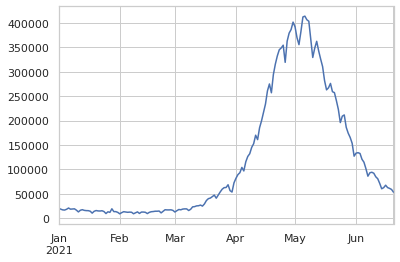

In [ ]:
confirmed_cases['India'].plot();    #initial plotting

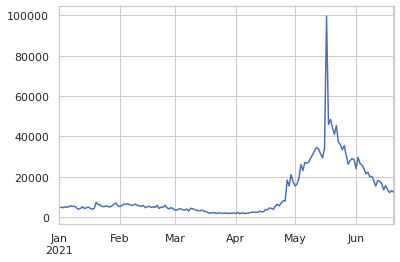

In [ ]:
recovered_cases['Kerala'].plot();

That peak seems to be an unrealistic value. We will exclude such an outlier.

In [ ]:
recovered_cases['Kerala'][recovered_cases['Kerala'] > 99000] = np.nan

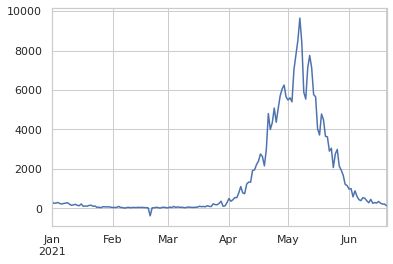

In [ ]:
confirmed_cases['Uttarakhand'].plot();

We find that there is an error in the data since the number of new cases can never be negative and therefore we cannot except that value.


In [ ]:
confirmed_cases[confirmed_cases['Uttarakhand']<0].index

DatetimeIndex(['2021-02-20'], dtype='datetime64[ns]', freq='D')

In [ ]:
confirmed_cases['Uttarakhand'][pd.date_range('2021-02-10','2021-02-28')]

2021-02-10     35
2021-02-11     48
2021-02-12     49
2021-02-13     44
2021-02-14     54
2021-02-15     47
2021-02-16     53
2021-02-17     44
2021-02-18     41
2021-02-19     26
2021-02-20   -374
2021-02-21     30
2021-02-22     32
2021-02-23     54
2021-02-24     47
2021-02-25     17
2021-02-26     53
2021-02-27     59
2021-02-28     43
Freq: D, Name: Uttarakhand, dtype: int64

Clearly this seems to be a mistake. We will exclude all such values.

In [ ]:
confirmed_cases[confirmed_cases<0] = np.nan   #excluding negative values
recovered_cases[recovered_cases<0] = np.nan

In [ ]:
confirmed_cases.to_csv('/content/confirmed_cases.csv', index = True)      #saving our data in a csv file
recovered_cases.to_csv('/content/recovered_cases.csv', index = True)

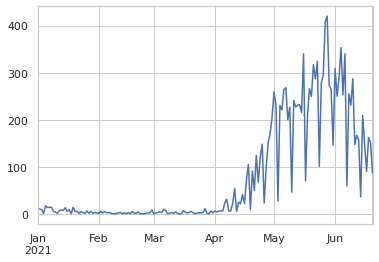

In [ ]:
confirmed_cases['Sikkim'].plot();

States with lesser number of cases seem to have more jaggered/unstable curves. We will make a detailed study of the states with most number of cases.

In [ ]:
confirmed_cases.mean().sort_values(ascending = False)[:6]

India            114901.000000
Maharashtra       23629.643275
Kerala            11979.304094
Karnataka         11034.836257
Tamil nadu         9382.941520
Uttar pradesh      6546.152047
dtype: float64

In [ ]:
recovered_cases.mean().sort_values(ascending = False)[:6]

India            110848.064327
Maharashtra       22753.865497
Kerala            11169.570588
Karnataka         10231.690058
Tamil nadu         8915.421053
Uttar pradesh      6521.356725
dtype: float64

In [ ]:
maharashtra_cases = pd.DataFrame([ confirmed_cases['Maharashtra'].rename('confirmed_cases') ,recovered_cases['Maharashtra'].rename('recovered_cases') ]).T
maharashtra_cases.describe()

,confirmed_cases,recovered_cases
count,171.000000,171.000000
mean,23629.643275,22753.865497
std,21985.216598,22235.294911
min,652.000000,1355.000000
25%,3711.000000,3748.500000
50%,14123.000000,13165.000000
75%,40168.500000,37603.500000
max,68631.000000,82266.000000


In [ ]:
#similarly for other states
kerala_cases = pd.DataFrame([ confirmed_cases['Kerala'].rename('confirmed_cases') ,recovered_cases['Kerala'].rename('recovered_cases') ]).T
karnataka_cases = pd.DataFrame([ confirmed_cases['Karnataka'].rename('confirmed_cases') ,recovered_cases['Karnataka'].rename('recovered_cases') ]).T
tamil_nadu_cases = pd.DataFrame([ confirmed_cases['Tamil nadu'].rename('confirmed_cases') ,recovered_cases['Tamil nadu'].rename('recovered_cases') ]).T
uttar_pradesh_cases = pd.DataFrame([ confirmed_cases['Uttar pradesh'].rename('confirmed_cases') ,recovered_cases['Uttar pradesh'].rename('recovered_cases') ]).T

all_cases = pd.DataFrame([ confirmed_cases['India'].rename('confirmed_cases') ,recovered_cases['India'].rename('recovered_cases') ]).T

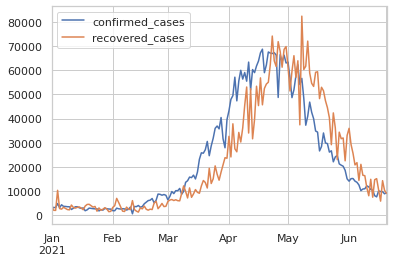

In [ ]:
maharashtra_cases.plot();

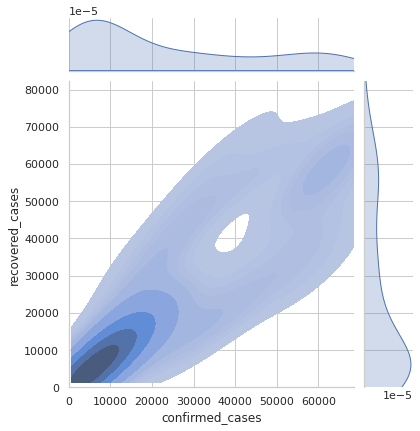

In [ ]:
sns.jointplot(data=maharashtra_cases, x="confirmed_cases", y="recovered_cases", kind="kde", cut = 0, fill = True,
              xlim = (0, maharashtra_cases['confirmed_cases'].max()), ylim = (0, maharashtra_cases['recovered_cases'].max()) );

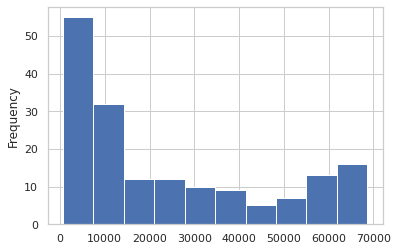

In [ ]:
confirmed_cases['Maharashtra'].plot(kind = 'hist');

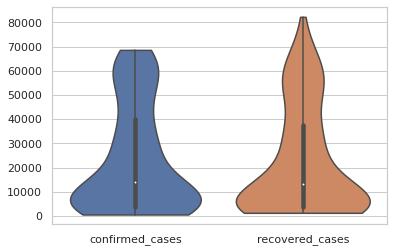

In [ ]:
sns.set_theme(style="whitegrid")
sns.violinplot(data = maharashtra_cases, cut = 0);

In [ ]:
def make_df(state_df, state_name):
  new_df = pd.DataFrame(state_df['confirmed_cases'].rename('no_of_cases'))
  new_df['type:'] = 'confirmed_cases'
  new_df2 = pd.DataFrame(state_df['recovered_cases'].rename('no_of_cases'))
  new_df2['type:'] = 'recovered_cases'
  df = pd.concat([new_df, new_df2])
  df['state'] = state_name
  return df
#reorganizing df by adding extra columns to use split violinplots

In [ ]:
main_df = pd.concat([make_df(maharashtra_cases, 'Maharashtra'), make_df(kerala_cases, 'Kerala')] )#add all states Mrunal

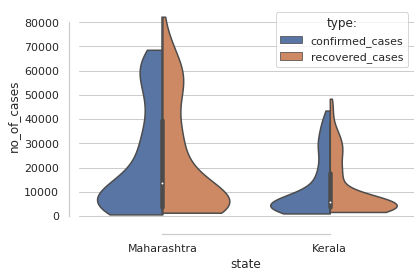

In [ ]:
sns.violinplot(data = main_df,x = 'state', y = 'no_of_cases', hue = 'type:', split = True, cut = 0)
sns.despine(offset=10, trim=True);

In [ ]:
# sampling functions
def s1(n,state_data,fromdate,todate):     #returns a single sample of n random values from state_data in the given data range
    sample=state_data[fromdate:todate].sample(n=n,replace=True)
    return sample

In [ ]:
def sampled_data(n_samples, n,state_data,fromdate,todate):       #returns sample parameters for n_samples samples
    mean_confirmed=np.zeros(n_samples)
    mean_recovered=np.zeros(n_samples)
    std_confirmed=np.zeros(n_samples)
    std_recovered=np.zeros(n_samples)
    for i in range(n_samples):
        df=s1(n,state_data,fromdate,todate)
        mean_confirmed[i]=df["confirmed_cases"].mean(skipna=True)
        std_confirmed[i]=np.std(df["confirmed_cases"])
        mean_recovered[i]=df["recovered_cases"].mean(skipna=True)
        std_recovered[i]=(np.std(df["recovered_cases"]))
    return mean_confirmed,std_confirmed,mean_recovered,std_recovered    
        

In [ ]:
a, b, c, d = sampled_data(1000, 20, maharashtra_cases, fromdate, todate)
np.mean(a)

23656.5892

In [ ]:
#add point 6 here


this is for point 9

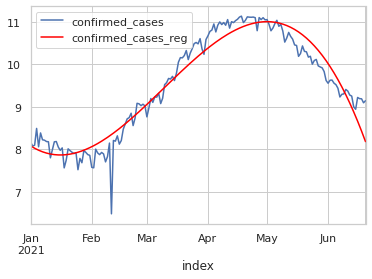

In [ ]:
df = maharashtra_cases.reset_index()
df['confirmed_cases'] = np.log(df['confirmed_cases'])
#del df['index']
coef = np.polyfit(x = df.index, y = df['confirmed_cases'], deg = 3)
df.insert(3, 'confirmed_cases_reg', np.poly1d(coef)(df.index) )
g = df.plot(x = 'index', y = 'confirmed_cases' )
df.plot(x = 'index', y = 'confirmed_cases_reg' ,color='Red',ax=g)
#plt.plot(df.index, np.poly1d(coef)(df.index) )
#np.log(maharashtra_cases).plot()

In [ ]:
np.polyfit?

In [ ]:
df['confirmed_cases'] = np.log(df['confirmed_cases'])
df['index'] = dates.datestr2num(df['index'])
sns.lmplot(x = 'index', y =  'confirmed_cases', data = df, order = 2)

TypeError: ignored

In [ ]:
from matplotlib import pyplot, dates

---

In [ ]:
Do not run these cells

In [ ]:
url = 'https://api.covid19india.org/v4/min/data.min.json'
rq = requests.get(url)
data = rq.json()

In [ ]:
confirmed = ['confirmed']
deceased = ['deceased']
recovered = ['recovered']
vaccinated = ['vaccinated']
stats = [st_ut, confirmed, deceased, recovered, vaccinated]

In [ ]:
for i in data:
  for j in stats[1:]:
    try:
      j.append(data[i]['delta'][j[0]])
    except:
      j.append(0)

In [ ]:
with open( str(date.today()) + '_total_stats.csv', 'w', newline='') as my_file:
         writer = csv.writer(my_file)
         writer.writerows(stats)
with open( str(date.today()) + '_total_stats_format_2.csv', 'w', newline='') as my_file:
         writer = csv.writer(my_file)
         for i in range(len(st_ut)):
          writer.writerow([stats[0][i], stats[1][i],stats[2][i],stats[3][i], stats[4][i]])

In [ ]:
#comfirmed for each state given two dates
with open( 'from_' + fromdate + '_to_' + todate + '_total_stats.csv', 'w', newline='') as time_file:
  writer = csv.writer(time_file)
  for state in data2:
    print("state :", state)
    for single_date in daterange(start_date, end_date):
      try:
        print( single_date.date(), data2[state]['dates'][str(single_date.date())]['delta']['confirmed'])
      except:
        print('error on ' + str(single_date.date()), " in ",state)
    print("\n")